In [3]:
import chess
import chess.pgn
import pandas as pd
import itertools

In [4]:
# Set up square data.
files = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
ranks = ['1', '2', '3', '4', '5', '6', '7', '8']
squares = [''.join(s) for s in itertools.product(*[files,ranks])]
print(squares)

['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8']


In [5]:
# Set up occupants keys. 
# All of the pieces of each color, plus an empty disignation.
occupants = ['wr', 'wn', 'wb', 'wq', 'wk', 'wp', 'br', 'bn', 'bb', 'bq', 'bk', 'bp', 'x']

In [6]:
# Location of downloaded pgn database file.
database_filename = 'C:/Users/alexpc2red/Documents/lichessgames/lichess_db_standard_rated_2016-03.pgn'

In [7]:
# Define a conversion from library color notation to ours.
def parse_piece_color(piece):
    if piece.color is None:
        return None
    elif piece.color:
        return 'w'
    else:
        return 'b'

In [8]:
# Determine if board state has not been seen yet.
# Return -1 if new board state, otherwise return index of seen board
def index_of_board_state(board_states, board_state_new):
    try: 
        return board_states.index(board_state_new)
    except ValueError:
        return -1

In [22]:
def parse_board_state(board):
    # Open database file.
    board_state = board.fen().split(' ')[0]
    return board_state

In [35]:
def parse_all_unique_board_states(max_games=-1):
    board_states = {}
    total_games = 0
    total_states = 0
    pgn = open(database_filename)
    while True:
        if total_games > max_games and max_games > 0:
            break
        game = chess.pgn.read_game(pgn)
        if game is None:
            break
        board = game.board()
        board_state = parse_board_state(board)
        total_states += 1
        if board_state not in board_states.keys():
            board_states[board_state] = 1
        else:
            board_states[board_state] += 1
        for move in game.mainline_moves():
            board.push(move)
            board_state = parse_board_state(board)
            total_states += 1
            if board_state not in board_states.keys():
                board_states[board_state] = 1
            else:
                board_states[board_state] += 1
        total_games += 1 
    print(f'Total states: {total_states}')
    return board_states

In [44]:
board_states = parse_all_unique_board_states(5000)
counts = [board_states[k] for k in board_states.keys()]
print(f'total unique states: {len(counts)}')
print(f'max states: {counts.sort()[-1]}')
print(f'2nd max states: {counts.sort()[-2]}')
print(f'3nd max states: {counts.sort()[-3]}')

Total states: 341279
total unique states: 307698


TypeError: 'NoneType' object is not subscriptable

In [45]:
len(board_states.keys())

307698

In [46]:
[board_states[k] for k in board_states.keys()]

[5001,
 2885,
 320,
 19,
 13,
 5,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1237,
 75,
 17,
 16,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 651,
 342,
 106,
 63,
 61,
 55,
 47,
 42,
 8,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 179,
 16,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

In [21]:
board_states.keys()

dict_keys(['rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR', 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR', 'rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR', 'rnbqkbnr/pppp1ppp/4p3/8/4P3/3P4/PPP2PPP/RNBQKBNR', 'rnbqkbnr/ppp2ppp/4p3/3p4/4P3/3P4/PPP2PPP/RNBQKBNR', 'rnbqkbnr/ppp2ppp/4p3/3p4/4P3/3P4/PPPN1PPP/R1BQKBNR', 'rnbqkbnr/ppp2ppp/4p3/8/4p3/3P4/PPPN1PPP/R1BQKBNR', 'rnbqkbnr/ppp2ppp/4p3/8/4N3/3P4/PPP2PPP/R1BQKBNR', 'rnbqkbnr/p1p2ppp/1p2p3/8/4N3/3P4/PPP2PPP/R1BQKBNR', 'rnbqkbnr/p1p2ppp/1p2p3/8/4N3/3P2P1/PPP2P1P/R1BQKBNR', 'rn1qkbnr/pbp2ppp/1p2p3/8/4N3/3P2P1/PPP2P1P/R1BQKBNR', 'rn1qkbnr/pbp2ppp/1p2p3/8/4N3/3P2P1/PPP2PBP/R1BQK1NR', 'rn1qk1nr/pbp1bppp/1p2p3/8/4N3/3P2P1/PPP2PBP/R1BQK1NR', 'rn1qk1nr/pbp1bppp/1p2pN2/8/8/3P2P1/PPP2PBP/R1BQK1NR', 'rn1qk1nr/pbp2ppp/1p2pb2/8/8/3P2P1/PPP2PBP/R1BQK1NR', 'rn1qk1nr/pBp2ppp/1p2pb2/8/8/3P2P1/PPP2P1P/R1BQK1NR', 'r2qk1nr/pBpn1ppp/1p2pb2/8/8/3P2P1/PPP2P1P/R1BQK1NR', 'B2qk1nr/p1pn1ppp/1p2pb2/8/8/3P2P1/PPP2P1P/R1BQK1NR', 'q3k1nr/p1pn1ppp/1p2pb2/8/8/3P2P1/P

In [121]:
board_states[0] == board_states[1]

True

403
403
1


In [101]:
board_states[0] == board_states[2]

False

In [87]:
print(len(board_states))

403


In [92]:
len(counts)

403

In [ ]:
board_states[1]

In [89]:
print(board_states[5])

{'a1': 'w', 'a1_occupant': 'wr', 'a2': 'w', 'a2_occupant': 'wp', 'a3': 'x', 'a3_occupant': 'x', 'a4': 'x', 'a4_occupant': 'x', 'a5': 'x', 'a5_occupant': 'x', 'a6': 'x', 'a6_occupant': 'x', 'a7': 'b', 'a7_occupant': 'bp', 'a8': 'b', 'a8_occupant': 'br', 'b1': 'w', 'b1_occupant': 'wn', 'b2': 'w', 'b2_occupant': 'wp', 'b3': 'x', 'b3_occupant': 'x', 'b4': 'x', 'b4_occupant': 'x', 'b5': 'x', 'b5_occupant': 'x', 'b6': 'x', 'b6_occupant': 'x', 'b7': 'b', 'b7_occupant': 'bp', 'b8': 'b', 'b8_occupant': 'bn', 'c1': 'w', 'c1_occupant': 'wb', 'c2': 'w', 'c2_occupant': 'wp', 'c3': 'x', 'c3_occupant': 'x', 'c4': 'x', 'c4_occupant': 'x', 'c5': 'x', 'c5_occupant': 'x', 'c6': 'x', 'c6_occupant': 'x', 'c7': 'b', 'c7_occupant': 'bp', 'c8': 'b', 'c8_occupant': 'bb', 'd1': 'w', 'd1_occupant': 'wq', 'd2': 'x', 'd2_occupant': 'x', 'd3': 'w', 'd3_occupant': 'wp', 'd4': 'x', 'd4_occupant': 'x', 'd5': 'b', 'd5_occupant': 'bp', 'd6': 'x', 'd6_occupant': 'x', 'd7': 'x', 'd7_occupant': 'x', 'd8': 'b', 'd8_occupant

In [82]:
bs = parse_board_state(board)
print(bs)
print(sys.getsizeof(bs))

{'a1': 'w', 'a1_occupant': 'wr', 'a2': 'w', 'a2_occupant': 'wp', 'a3': 'x', 'a3_occupant': 'x', 'a4': 'x', 'a4_occupant': 'x', 'a5': 'x', 'a5_occupant': 'x', 'a6': 'x', 'a6_occupant': 'x', 'a7': 'b', 'a7_occupant': 'bp', 'a8': 'b', 'a8_occupant': 'br', 'b1': 'w', 'b1_occupant': 'wn', 'b2': 'w', 'b2_occupant': 'wp', 'b3': 'x', 'b3_occupant': 'x', 'b4': 'x', 'b4_occupant': 'x', 'b5': 'x', 'b5_occupant': 'x', 'b6': 'x', 'b6_occupant': 'x', 'b7': 'b', 'b7_occupant': 'bp', 'b8': 'b', 'b8_occupant': 'bn', 'c1': 'w', 'c1_occupant': 'wb', 'c2': 'w', 'c2_occupant': 'wp', 'c3': 'x', 'c3_occupant': 'x', 'c4': 'x', 'c4_occupant': 'x', 'c5': 'x', 'c5_occupant': 'x', 'c6': 'x', 'c6_occupant': 'x', 'c7': 'b', 'c7_occupant': 'bp', 'c8': 'b', 'c8_occupant': 'bb', 'd1': 'w', 'd1_occupant': 'wq', 'd2': 'w', 'd2_occupant': 'wp', 'd3': 'x', 'd3_occupant': 'x', 'd4': 'x', 'd4_occupant': 'x', 'd5': 'x', 'd5_occupant': 'x', 'd6': 'x', 'd6_occupant': 'x', 'd7': 'b', 'd7_occupant': 'bp', 'd8': 'b', 'd8_occupant

In [47]:
import sys

In [51]:
new_bs = {}
for key in bs.keys():
    new_bs[key] = 0


4696

In [52]:
import copy

In [53]:
sys.getsizeof([copy.deepcopy(bs),copy.deepcopy(bs)])

72

In [71]:
print(game1.board())

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [81]:
['a','b','c','d','e','f'][[1,2,3]]

<>:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
C:\Users\alexpc2red\AppData\Local\Temp\ipykernel_10724\3330116584.py:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
  ['a','b','c','d','e','f'][[1,2,3]]
C:\Users\alexpc2red\AppData\Local\Temp\ipykernel_10724\3330116584.py:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
  ['a','b','c','d','e','f'][[1,2,3]]
C:\Users\alexpc2red\AppData\Local\Temp\ipykernel_10724\3330116584.py:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
  ['a','b','c','d','e','f'][[1,2,3]]


TypeError: list indices must be integers or slices, not list

In [116]:
ValueError

ValueError

In [37]:
board2 = chess.Board()

In [38]:
help(board2)

Help on Board in module chess object:

class Board(BaseBoard)
 |  Board(fen: 'Optional[str]' = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1', *, chess960: 'bool' = False) -> 'None'
 |  
 |  A :class:`~chess.BaseBoard`, additional information representing
 |  a chess position, and a :data:`move stack <chess.Board.move_stack>`.
 |  
 |  Provides :data:`move generation <chess.Board.legal_moves>`, validation,
 |  :func:`parsing <chess.Board.parse_san()>`, attack generation,
 |  :func:`game end detection <chess.Board.is_game_over()>`,
 |  and the capability to :func:`make <chess.Board.push()>` and
 |  :func:`unmake <chess.Board.pop()>` moves.
 |  
 |  The board is initialized to the standard chess starting position,
 |  unless otherwise specified in the optional *fen* argument.
 |  If *fen* is ``None``, an empty board is created.
 |  
 |  Optionally supports *chess960*. In Chess960, castling moves are encoded
 |  by a king move to the corresponding rook square.
 |  Use :func:`c

In [41]:
board2.set_fen('r2qrk2/p4ppp/3b4/5Q2/3P4/4BN2/PP3PPP/R3K2R')

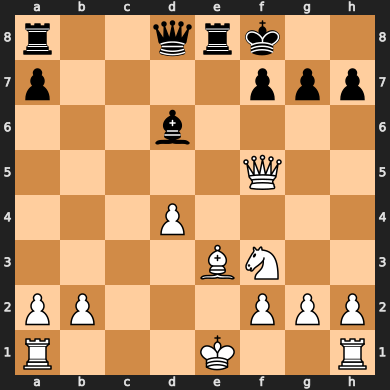

In [42]:
board2